In [1]:
#https://ieeexplore.ieee.org/document/10549889

In [2]:
!pip install openpyxl

Defaulting to user installation because normal site-packages is not writeable


In [3]:
import keras.models
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns

2024-08-21 15:38:46.165824: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9360] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-21 15:38:46.165913: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-21 15:38:46.165937: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1537] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-08-21 15:38:46.173934: I tensorflow/core/platform/cpu_feature_guard.cc:183] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE3 SSE4.1 SSE4.2 AVX, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [4]:
# Load datasets
ppg_data_combined = pd.read_excel('combined_dataset.xlsx')

ppg_data_combined['Sex(M/F)'] = ppg_data_combined['Sex(M/F)'].map({'Male': 1, 'Female': 0})

print(ppg_data_combined)

     Num.  subject_ID  Sex(M/F)  Age(year)  Height(cm)  Weight(kg)  \
0       1           2         0         45         152          63   
1       1           2         0         45         152          63   
2       1           2         0         45         152          63   
3       2           3         0         50         157          50   
4       2           3         0         50         157          50   
..    ...         ...       ...        ...         ...         ...   
652   218         418         1         25         173          63   
653   218         418         1         25         173          63   
654   219         419         1         24         175          58   
655   219         419         1         24         175          58   
656   219         419         1         24         175          58   

     Systolic Blood Pressure(mmHg)  Diastolic Blood Pressure(mmHg)  \
0                              161                              89   
1                  

In [5]:
# 참가자의 숫자 확인
print(ppg_data_combined['subject_ID'].nunique())

219


The dataset provided by Liang et al. in their study is a valuable resource for non-invasive CVD detection, encompassing 657 data segments from 219 individuals.

In [6]:
data_systolic = ppg_data_combined["Systolic Blood Pressure(mmHg)"]
data_diastolic = ppg_data_combined["Diastolic Blood Pressure(mmHg)"]
data_sex = ppg_data_combined["Sex(M/F)"]
data_age = ppg_data_combined["Age(year)"]
data_height = ppg_data_combined["Height(cm)"]
data_weight = ppg_data_combined["Weight(kg)"]
data_hr = ppg_data_combined["Heart Rate(b/m)"]
data_bmi = ppg_data_combined["BMI(kg/m^2)"]

ppg_data = ppg_data_combined.iloc[:,14:]

data_personal = pd.concat([data_sex, data_age, data_height, data_weight, data_hr, data_bmi], axis=1)

In [7]:
# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler to your data
scaler.fit(data_personal)

# Transform the data
normalized_data = scaler.transform(data_personal)

In [8]:
# Convert back to a DataFrame (optional, if you need the result as a DataFrame)
normalized_df = pd.DataFrame(normalized_data, columns=data_personal.columns)

ppg_data = np.array(ppg_data)
data_personal = np.array(normalized_df)
print(ppg_data)
print(data_personal)

[[2438 2438 2438 ... 1827 1754 1754]
 [2201 2201 2171 ... 1997 1997 1997]
 [2019 2014 2014 ... 1924 1929 1929]
 ...
 [3083 3039 3071 ... 2422 2451 2379]
 [2426 2431 2446 ... 3103 3146 3151]
 [2691 2718 2743 ... 2611 2639 2623]]
[[0.         0.36923077 0.1372549  0.40298507 0.83333333 0.55232326]
 [0.         0.36923077 0.1372549  0.40298507 0.83333333 0.55232326]
 [0.         0.36923077 0.1372549  0.40298507 0.83333333 0.55232326]
 ...
 [1.         0.04615385 0.58823529 0.32835821 0.24074074 0.18650234]
 [1.         0.04615385 0.58823529 0.32835821 0.24074074 0.18650234]
 [1.         0.04615385 0.58823529 0.32835821 0.24074074 0.18650234]]


In [9]:
# Assuming bp_data has columns 'systolic' and 'diastolic'
# Normalize blood pressure data
bp_data = np.array([data_systolic, data_diastolic]).T
print(bp_data)

[[161  89]
 [161  89]
 [161  89]
 ...
 [108  68]
 [108  68]
 [108  68]]


In [10]:
# Split the data into training and testing sets
X_train2100, X_test2100, y_train, y_test = train_test_split(ppg_data, bp_data, test_size=0.25, random_state=42)
X_train6, X_test6, y_train, y_test = train_test_split(data_personal, bp_data, test_size=0.25, random_state=42)

In [11]:
# Reshape input to be [samples, time steps, features]
X_train2100 = np.reshape(X_train2100, (X_train2100.shape[0], 1, X_train2100.shape[1]))
X_test2100 = np.reshape(X_test2100, (X_test2100.shape[0], 1, X_test2100.shape[1]))

In [12]:
# Reshape input to be [samples, time steps, features]
X_train6 = np.reshape(X_train6, (X_train6.shape[0], 1, X_train6.shape[1]))
X_test6 = np.reshape(X_test6, (X_test6.shape[0], 1, X_test6.shape[1]))

In [20]:
print(X_test2100.shape)
print(X_test6.shape)

(165, 1, 2100)
(165, 1, 6)


In [13]:
'''
final_model = keras.models.load_model("model_v3.h5")
'''

'\nfinal_model = keras.models.load_model("model_v3.h5")\n'

In [14]:
'''
predicted_bp = final_model.predict([X_test6, X_test2100])
print(predicted_bp)
'''

'\npredicted_bp = final_model.predict([X_test6, X_test2100])\nprint(predicted_bp)\n'

In [27]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, GRU, Dense, Concatenate

# 첫 번째 입력: Personal Data (1, 6)
input1 = Input(shape=(1, 6), name='Input1')
x1 = GRU(32, return_sequences=True, activation='relu')(input1)
x1 = GRU(32, return_sequences=True, activation='relu')(x1)
x1 = GRU(32, return_sequences=True, activation='relu')(x1)
x1 = GRU(32, return_sequences=True, activation='relu')(x1)
x1 = GRU(32, activation='relu')(x1)

# 두 번째 입력: PPG Signal (1, 2100)
input2 = Input(shape=(1, 2100), name='Input2')
x2 = GRU(64, return_sequences=True, activation='relu')(input2)
x2 = GRU(64, return_sequences=True, activation='relu')(x2)
x2 = GRU(64, activation='relu')(x2)

# 두 경로를 병합 (Concatenation)
merged = Concatenate()([x1, x2])

# Dense layers
x = Dense(64, activation='relu')(merged)
x = Dense(32, activation='relu')(x)
x = Dense(16, activation='relu')(x)
x = Dense(8, activation='relu')(x)

# SBP와 DBP 예측 후 결합하여 반환
output = Dense(2, name='BP')(x)

# 모델 정의
model = Model(inputs=[input1, input2], outputs=output)

# 모델 컴파일
model.compile(optimizer='adam', loss='mse')

# 모델 요약 출력
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 Input1 (InputLayer)         [(None, 1, 6)]               0         []                            
                                                                                                  
 gru_29 (GRU)                (None, 1, 32)                3840      ['Input1[0][0]']              
                                                                                                  
 gru_30 (GRU)                (None, 1, 32)                6336      ['gru_29[0][0]']              
                                                                                                  
 Input2 (InputLayer)         [(None, 1, 2100)]            0         []                            
                                                                                            

In [28]:
predicted_bp = model.predict([X_test6, X_test2100])
print(predicted_bp)

6/6 [==============================] - 1s 4ms/step
[[ 7.82630920e-01  4.57650490e+01]
 [-8.03953362e+00  5.44007759e+01]
 [ 7.63990211e+00  7.87357178e+01]
 [ 9.26183128e+00  7.93396912e+01]
 [ 1.30168571e+01  7.74169159e+01]
 [ 9.37741852e+00  7.28846512e+01]
 [-8.92369461e+00  2.27073803e+01]
 [ 1.13138351e+01  8.05507965e+01]
 [ 5.89288044e+00  5.95031662e+01]
 [-9.73202038e+00  2.62920895e+01]
 [-2.79461098e+00  1.11489967e+02]
 [-9.23892403e+00  1.05042580e+02]
 [ 6.84840536e+00  3.89637413e+01]
 [ 8.78659821e+00  8.14484711e+01]
 [ 2.92203331e+00  8.26421356e+01]
 [-1.19045000e+01  2.10508232e+01]
 [-5.85594177e+00  1.08409676e+02]
 [-1.44911871e+01  3.00918789e+01]
 [-5.73788452e+00  1.09129211e+02]
 [ 1.18766727e+01  7.52294846e+01]
 [ 1.51592255e+00  1.10644806e+02]
 [ 1.15632305e+01  7.73045425e+01]
 [-1.10432863e+01  2.66616249e+01]
 [ 1.33197689e+01  7.78044968e+01]
 [-7.14218903e+00  1.03989258e+02]
 [ 1.01608200e+01  8.26531143e+01]
 [ 1.08381195e+01  7.82794037e+01]
 [ 8

In [29]:
# Systolic values
y_test_systolic = y_test[:, 0]
predicted_systolic = predicted_bp[:, 0]

In [30]:
# Diastolic values
y_test_diastolic = y_test[:, 1]
predicted_diastolic = predicted_bp[:, 1]

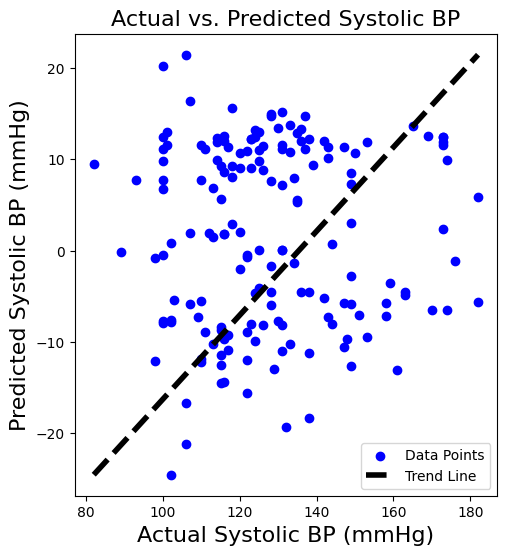

In [31]:
# Plotting actual vs. predicted Systolic Blood Pressure
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(y_test_systolic, predicted_systolic, label='Data Points', color='blue')
plt.plot([y_test_systolic.min(), y_test_systolic.max()], [predicted_systolic.min(), predicted_systolic.max()], 'k--', lw=4, label='Trend Line')
plt.xlabel('Actual Systolic BP (mmHg)', fontsize=16)
plt.ylabel('Predicted Systolic BP (mmHg)', fontsize=16)
plt.title('Actual vs. Predicted Systolic BP', fontsize=16)
plt.legend()

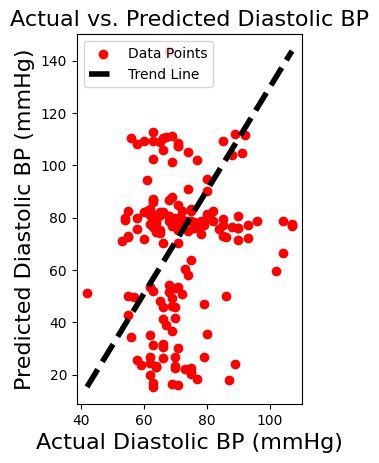

In [32]:
# Plotting actual vs. predicted Diastolic Blood Pressure
plt.subplot(1, 2, 2)
plt.scatter(y_test_diastolic, predicted_diastolic, label='Data Points', color='red')
plt.plot([y_test_diastolic.min(), y_test_diastolic.max()], [predicted_diastolic.min(), predicted_diastolic.max()], 'k--', lw=4, label='Trend Line')
plt.xlabel('Actual Diastolic BP (mmHg)', fontsize=16)
plt.ylabel('Predicted Diastolic BP (mmHg)', fontsize=16)
plt.title('Actual vs. Predicted Diastolic BP', fontsize=16)
plt.legend()

In [33]:
plt.tight_layout()
plt.savefig('PPG/SBP-DBP-prediction.png', dpi=300)
plt.show()

<Figure size 640x480 with 0 Axes>

In [34]:
# Bland-Altman Plot for Systolic Blood Pressure
mean_systolic = np.mean([y_test_systolic, predicted_systolic], axis=0)
diff_systolic = y_test_systolic - predicted_systolic
mean_diff_systolic = np.mean(diff_systolic)
std_diff_systolic = np.std(diff_systolic)
upper_limit_systolic = mean_diff_systolic + 1.96 * std_diff_systolic
lower_limit_systolic = mean_diff_systolic - 1.96 * std_diff_systolic

# Bland-Altman Plot for Diastolic Blood Pressure
mean_diastolic = np.mean([y_test_diastolic, predicted_diastolic], axis=0)
diff_diastolic = y_test_diastolic - predicted_diastolic
mean_diff_diastolic = np.mean(diff_diastolic)
std_diff_diastolic = np.std(diff_diastolic)
upper_limit_diastolic = mean_diff_diastolic + 1.96 * std_diff_diastolic
lower_limit_diastolic = mean_diff_diastolic - 1.96 * std_diff_diastolic

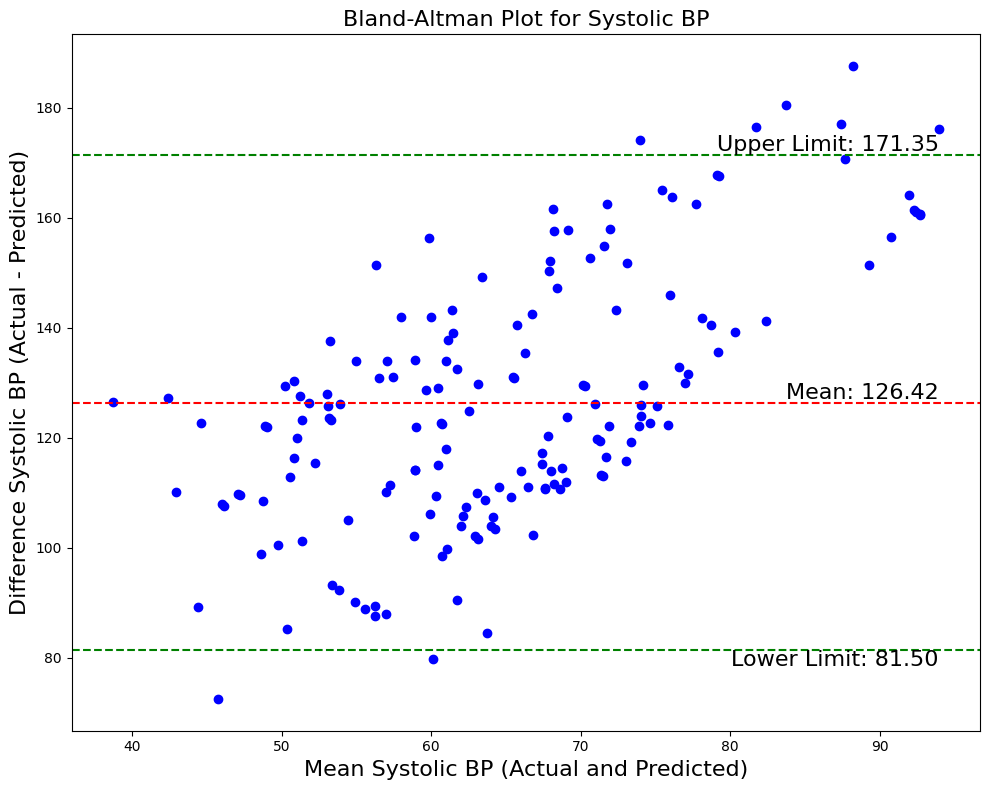

In [35]:
plt.figure(figsize=(10, 8))
# Systolic Bland-Altman Plot
# plt.subplot(1, 2, 1)
plt.scatter(mean_systolic, diff_systolic, color='blue')
plt.axhline(mean_diff_systolic, color='red', linestyle='--')
plt.axhline(mean_diff_systolic + 1.96 * std_diff_systolic, color='green', linestyle='--')
plt.axhline(mean_diff_systolic - 1.96 * std_diff_systolic, color='green', linestyle='--')
plt.text(x=max(mean_systolic), y=mean_diff_systolic, s=f'Mean: {mean_diff_systolic:.2f}', va='bottom', ha='right', fontsize=16)
plt.text(x=max(mean_systolic), y=upper_limit_systolic, s=f'Upper Limit: {upper_limit_systolic:.2f}', va='bottom', ha='right', fontsize=16)
plt.text(x=max(mean_systolic), y=lower_limit_systolic, s=f'Lower Limit: {lower_limit_systolic:.2f}', va='top', ha='right', fontsize=16)
plt.xlabel('Mean Systolic BP (Actual and Predicted)', fontsize=16)
plt.ylabel('Difference Systolic BP (Actual - Predicted)', fontsize=16)
plt.title('Bland-Altman Plot for Systolic BP', fontsize=16)
plt.tight_layout()
plt.savefig('PPG/Bland-Altman-Plot-SBP.png', dpi=300)
plt.show()

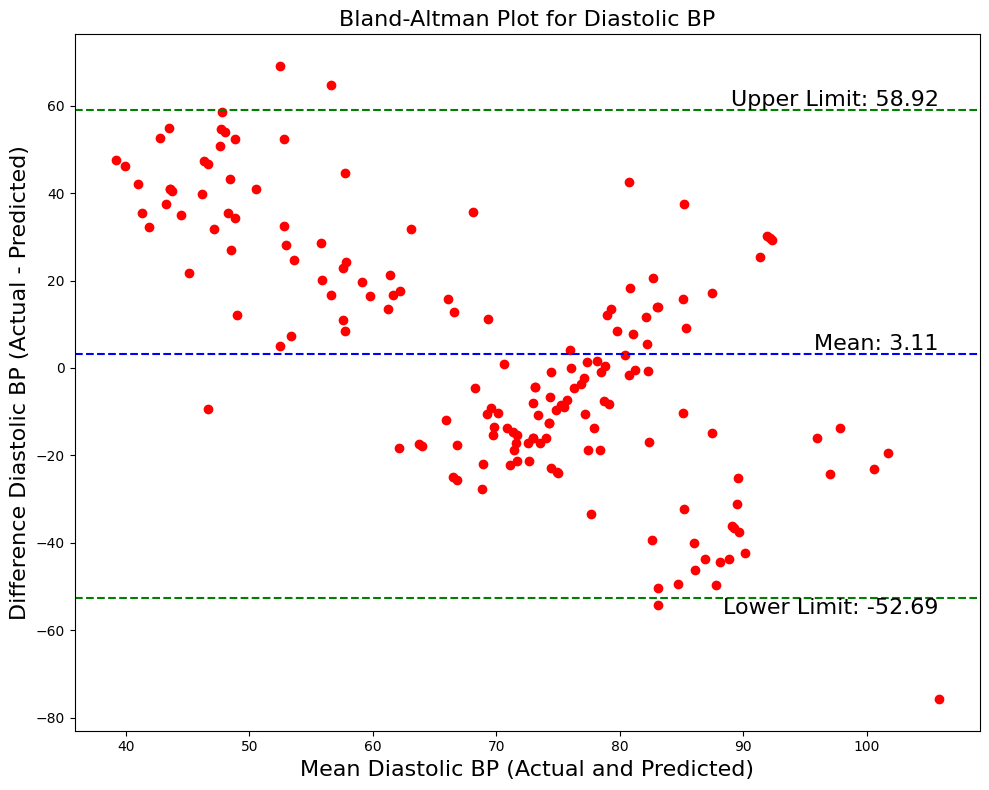

In [36]:
# Diastolic Bland-Altman Plot
plt.figure(figsize=(10, 8))
# plt.subplot(1, 2, 2)
plt.scatter(mean_diastolic, diff_diastolic, color='red')
plt.axhline(mean_diff_diastolic, color='blue', linestyle='--')
plt.axhline(mean_diff_diastolic + 1.96 * std_diff_diastolic, color='green', linestyle='--')
plt.axhline(mean_diff_diastolic - 1.96 * std_diff_diastolic, color='green', linestyle='--')
plt.text(x=max(mean_diastolic), y=mean_diff_diastolic, s=f'Mean: {mean_diff_diastolic:.2f}', va='bottom', ha='right', fontsize=16)
plt.text(x=max(mean_diastolic), y=upper_limit_diastolic, s=f'Upper Limit: {upper_limit_diastolic:.2f}', va='bottom', ha='right', fontsize=16)
plt.text(x=max(mean_diastolic), y=lower_limit_diastolic, s=f'Lower Limit: {lower_limit_diastolic:.2f}', va='top', ha='right', fontsize=16)
plt.xlabel('Mean Diastolic BP (Actual and Predicted)', fontsize=16)
plt.ylabel('Difference Diastolic BP (Actual - Predicted)', fontsize=16)
plt.title('Bland-Altman Plot for Diastolic BP', fontsize=16)

plt.tight_layout()
plt.savefig('PPG/Bland-Altman-Plot-DBP.png', dpi=300)
plt.show()

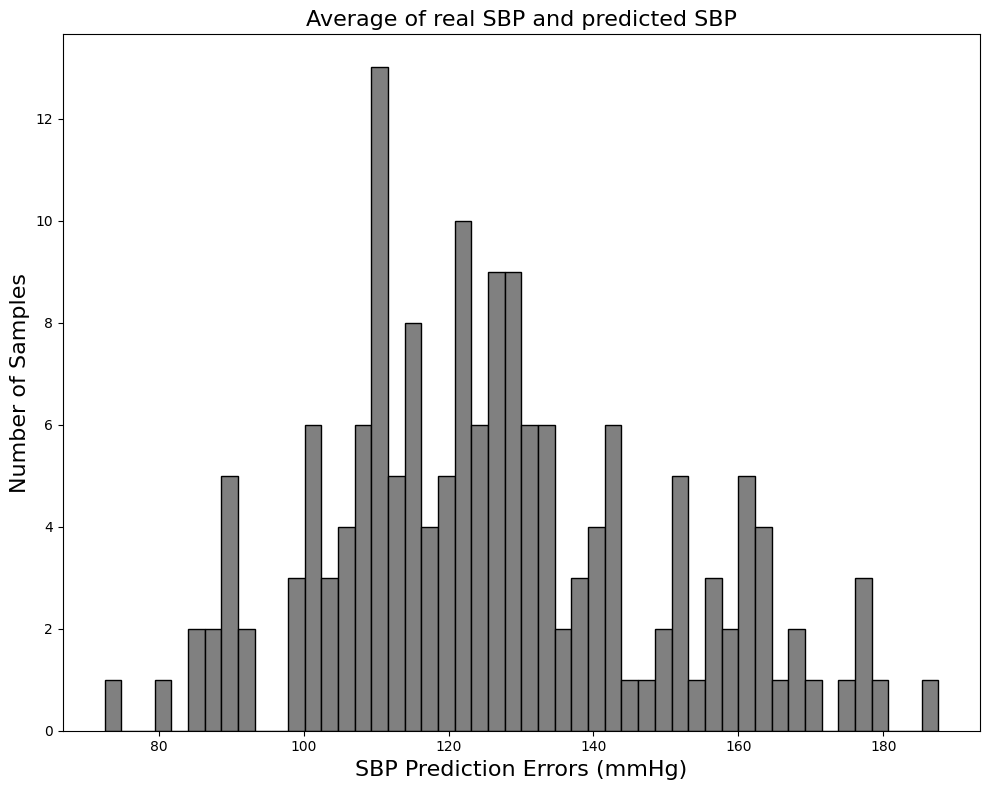

In [37]:
# Calculate prediction errors
errors_systolic = y_test_systolic - predicted_systolic
errors_diastolic = y_test_diastolic - predicted_diastolic

# Create histograms
plt.figure(figsize=(10, 8))

# Histogram for Systolic Blood Pressure Errors
# plt.subplot(1, 2, 1)
plt.hist(errors_systolic, bins=50, color='gray', edgecolor='black')
plt.xlabel('SBP Prediction Errors (mmHg)', fontsize=16)
plt.ylabel('Number of Samples', fontsize=16)
plt.title('Average of real SBP and predicted SBP', fontsize=16)
plt.tight_layout()
plt.savefig('PPG/Prediction-errors-SBP.png', dpi=300)
plt.show()

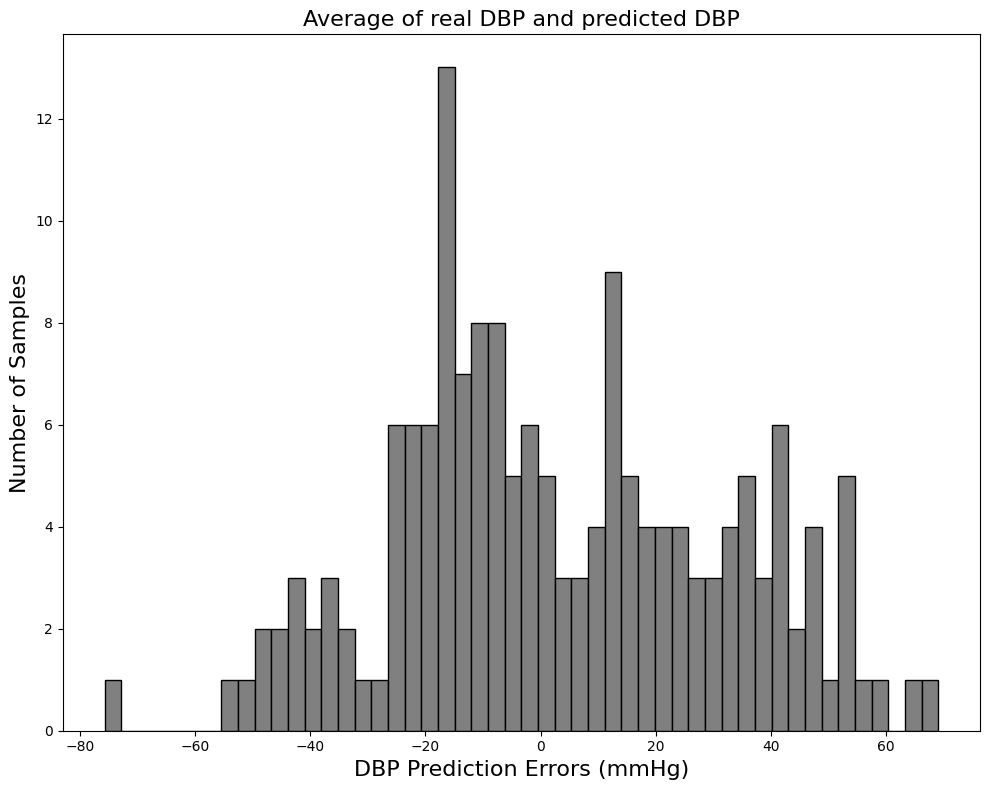

In [38]:
# Histogram for Diastolic Blood Pressure Errors
plt.figure(figsize=(10, 8))
# plt.subplot(1, 2, 2)
plt.hist(errors_diastolic, bins=50, color='gray', edgecolor='black')
plt.xlabel('DBP Prediction Errors (mmHg)', fontsize=16)
plt.ylabel('Number of Samples', fontsize=16)
plt.title('Average of real DBP and predicted DBP', fontsize=16)

plt.tight_layout()
plt.savefig('PPG/Prediction-errors-DBP.png', dpi=300)
plt.show()

In [39]:
# Calculate MAE
mae_systolic = np.mean(np.abs(errors_systolic))
mae_diastolic = np.mean(np.abs(errors_diastolic))

# Calculate MAPD
mapd_systolic = np.mean(np.abs(errors_systolic / y_test_systolic)) * 100
mapd_diastolic = np.mean(np.abs(errors_diastolic / y_test_diastolic)) * 100

# Calculate Cumulative Percentages (CP)
cp_systolic_5 = np.mean(np.abs(errors_systolic) <= 5) * 100
cp_systolic_10 = np.mean(np.abs(errors_systolic) <= 10) * 100
cp_systolic_15 = np.mean(np.abs(errors_systolic) <= 15) * 100
cp_diastolic_5 = np.mean(np.abs(errors_diastolic) <= 5) * 100
cp_diastolic_10 = np.mean(np.abs(errors_diastolic) <= 10) * 100
cp_diastolic_15 = np.mean(np.abs(errors_diastolic) <= 15) * 100

# Calculate ME
me_systolic = np.mean(errors_systolic)
me_diastolic = np.mean(errors_diastolic)

# Calculate SD
sd_systolic = np.std(errors_systolic)
sd_diastolic = np.std(errors_diastolic)

In [40]:
# Printing results
print("Systolic BP:")
print(f"MAE: {mae_systolic:.3f} mmHg")
print(f"MAPD: {mapd_systolic:.3f}%")
print(f"CP within 5 mmHg: {cp_systolic_5:.3f}%")
print(f"CP within 10 mmHg: {cp_systolic_10:.3f}%")
print(f"CP within 15 mmHg: {cp_systolic_15:.3f}%")
print(f"ME: {me_systolic:.3f} mmHg")
print(f"SD: {sd_systolic:.3f} mmHg")

print("\nDiastolic BP:")
print(f"MAE: {mae_diastolic:.3f} mmHg")
print(f"MAPD: {mapd_diastolic:.3f}%")
print(f"CP within 5 mmHg: {cp_diastolic_5:.3f}%")
print(f"CP within 10 mmHg: {cp_diastolic_10:.3f}%")
print(f"CP within 15 mmHg: {cp_diastolic_15:.3f}%")
print(f"ME: {me_diastolic:.3f} mmHg")
print(f"SD: {sd_diastolic:.3f} mmHg")

Systolic BP:
MAE: 126.424 mmHg
MAPD: 98.757%
CP within 5 mmHg: 0.000%
CP within 10 mmHg: 0.000%
CP within 15 mmHg: 0.000%
ME: 126.424 mmHg
SD: 22.923 mmHg

Diastolic BP:
MAE: 23.590 mmHg
MAPD: 34.037%
CP within 5 mmHg: 10.909%
CP within 10 mmHg: 21.212%
CP within 15 mmHg: 35.758%
ME: 3.114 mmHg
SD: 28.472 mmHg
